In [1]:
import oceanspy as ospy
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [8]:
# Load data
path = [
    r'D:\MScData\model_69_section.nc',
    r'D:\MScData\model_70_section.nc',
    r'D:\MScData\model_71_section.nc',
    r'D:\MScData\model_72_section.nc',
    r'D:\MScData\model_735_section.nc',
    r'D:\MScData\model_75_section.nc'

]
model_data = [xr.open_dataset(x) for x in path]

In [9]:
display(model_data)

[<xarray.Dataset>
 Dimensions:            (station: 22, Z: 216, Zp1: 217, Zu: 216, Zl: 216,
                         time: 1460, time_midp: 1459, station_midp: 21)
 Coordinates:
     lat                (station) float64 ...
     lon                (station) float64 ...
   * Z                  (Z) float64 -1.0 -3.5 -7.0 ... -3.922e+03 -3.942e+03
   * Zp1                (Zp1) float64 0.0 -2.0 -5.0 ... -3.932e+03 -3.951e+03
   * Zu                 (Zu) float64 -2.0 -5.0 -9.0 ... -3.932e+03 -3.951e+03
   * Zl                 (Zl) float64 0.0 -2.0 -5.0 ... -3.913e+03 -3.932e+03
   * time               (time) datetime64[ns] 2017-09-01 ... 2018-08-31T18:00:00
   * time_midp          (time_midp) datetime64[ns] 2017-09-01T03:00:00 ... 201...
   * station            (station) int64 0 1 2 3 4 5 6 7 ... 15 16 17 18 19 20 21
     station_dist       (station) float64 ...
   * station_midp       (station_midp) float64 0.5 1.5 2.5 3.5 ... 18.5 19.5 20.5
     station_midp_dist  (station_midp) float64 .

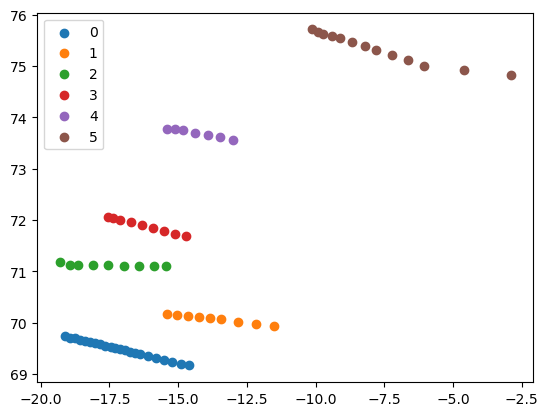

In [11]:
fig, ax = plt.subplots()
for x,data in enumerate(model_data):
    ax.scatter(data.lon,data.lat,label=x)
ax.legend()